## Image Classification using different models 

Loading required packages

In [ ]:

import os
import cv2
import numpy as np
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import roc_curve, roc_auc_score, f1_score,accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,BatchNormalization,Dense,SeparableConv2D,MaxPooling2D,Activation,Flatten,Dropout

Reading the image data file which was extracted using opencv package.

In [ ]:
from pandas._libs import index
pca_df = pd.read_csv('final_file_name_32.csv')

In [ ]:
pca_df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-5.408008,-4.281272,1.325507,-1.063235,1.427948,-0.226930,-0.101208,0.990990,0.567982,-0.028487,...,0.214802,-0.046394,0.483026,0.188944,0.242263,-0.065016,-0.075413,0.086132,0.025027,0.0
1,-6.101470,-4.319247,1.650522,-1.435934,1.519484,-0.251117,-0.216583,0.779328,0.403142,0.044929,...,0.230817,-0.082310,0.509804,0.050464,0.153350,-0.012631,-0.160663,-0.021641,0.047297,0.0
2,6.290730,-1.704117,5.145853,8.732818,1.945425,-1.784295,0.029510,3.115784,-5.086084,7.207264,...,1.545984,-0.496508,0.902838,-0.485467,0.160793,0.301404,-0.987037,-1.359818,0.603299,0.0
3,10.596232,-6.770785,2.933228,-0.480293,2.228289,0.558435,0.518315,1.679756,-0.845537,0.695259,...,-0.132724,-0.377732,0.314364,0.095066,-0.193049,-0.016463,-0.493284,0.274281,0.243993,0.0
4,0.925651,2.112792,-7.045400,3.280405,0.318000,1.264022,6.417850,-2.786413,2.006446,-2.244314,...,0.860747,0.346555,-1.873588,0.255902,0.069769,0.051855,0.512382,0.453218,-0.057594,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,11.337869,4.729838,0.844932,2.476028,-1.733282,0.571368,0.270742,-0.313835,1.021644,-0.030834,...,1.317397,-3.402660,-1.184491,0.824053,0.591994,-0.585033,-0.304948,-0.599675,-0.543202,1.0
5448,6.062906,-1.287611,0.278752,0.314729,-2.665635,0.726191,0.638834,1.329309,1.285659,1.023629,...,-0.414227,-0.478756,0.232094,-0.152721,-0.420183,0.667323,1.414726,-0.478336,-1.315262,1.0
5449,27.589103,6.255356,5.576341,0.929598,-4.110639,-0.530822,-0.349460,-0.436885,7.003317,0.001242,...,-1.224484,-1.589222,-1.767186,0.097009,0.290932,-1.474285,0.428829,-0.847211,-0.389840,1.0
5450,-4.095399,-2.481529,2.537560,0.320517,-2.043443,-0.312272,-0.555454,1.188324,-0.459362,-0.285414,...,0.143243,-0.220297,0.055598,-0.270434,-0.198810,0.097638,0.078929,0.023540,-0.037050,1.0


In [ ]:
pca_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,...,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5.452000e+03,5452.000000
mean,2.675613e-15,-5.091550e-15,-2.233316e-15,-4.793590e-15,-7.917364e-16,3.143813e-15,7.311018e-15,-6.856584e-15,1.320069e-14,-1.323055e-14,...,4.422280e-15,6.627962e-15,4.012035e-16,-1.175061e-15,9.195791e-16,-1.698324e-16,-3.126830e-15,-2.669341e-15,-5.328979e-15,0.500000
std,9.144273e+00,3.655887e+00,3.420602e+00,2.453160e+00,2.145897e+00,1.850036e+00,1.722962e+00,1.566103e+00,1.462345e+00,1.176736e+00,...,5.876820e-01,5.414605e-01,5.341143e-01,5.103464e-01,5.017748e-01,4.808358e-01,4.648383e-01,4.369493e-01,4.292028e-01,0.500046
min,-2.708397e+01,-9.820874e+00,-1.176878e+01,-8.717057e+00,-1.093724e+01,-7.477058e+00,-9.731652e+00,-8.595627e+00,-8.367229e+00,-6.149242e+00,...,-2.901683e+00,-3.462117e+00,-3.044685e+00,-4.070545e+00,-2.761758e+00,-3.071636e+00,-3.090164e+00,-3.239397e+00,-2.477775e+00,0.000000
25%,-5.919001e+00,-2.228466e+00,-2.574992e+00,-1.515530e+00,-1.155827e+00,-9.607501e-01,-9.115369e-01,-9.204192e-01,-8.951617e-01,-5.468256e-01,...,-2.868998e-01,-2.412883e-01,-2.442483e-01,-2.243799e-01,-2.429807e-01,-2.465033e-01,-2.220459e-01,-1.786643e-01,-1.936761e-01,0.000000
50%,-2.557723e+00,-7.836243e-01,-7.926751e-02,-3.916057e-01,-6.930264e-02,-1.073983e-01,-1.301010e-01,4.394039e-02,-2.649743e-02,4.182540e-02,...,-2.958184e-02,-1.004377e-03,-1.807019e-03,-4.968090e-03,6.219038e-04,8.041165e-03,-2.252556e-02,-1.356691e-03,-4.214579e-03,0.500000
75%,6.344883e+00,1.322449e+00,2.184910e+00,8.189109e-01,1.225281e+00,7.770974e-01,5.017357e-01,9.163993e-01,7.478428e-01,6.180102e-01,...,2.355058e-01,2.476775e-01,2.570038e-01,2.130881e-01,2.307909e-01,2.475376e-01,1.967958e-01,1.901888e-01,1.879494e-01,1.000000
max,3.975978e+01,1.281375e+01,1.410014e+01,1.099934e+01,1.227036e+01,9.651484e+00,1.153888e+01,9.523630e+00,8.729852e+00,7.207264e+00,...,3.732800e+00,3.761908e+00,3.702950e+00,4.231297e+00,2.866659e+00,3.384995e+00,3.177904e+00,4.773792e+00,3.210857e+00,1.000000


Separating features from target/label . And then splitting data into train and test data .

In [ ]:
x = pca_df.iloc[:,:-1]
y = pca_df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('image data Split success')

image data Split success


In [ ]:
#f1,ax = plt.subplots(figsize=(30, 30))
#sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

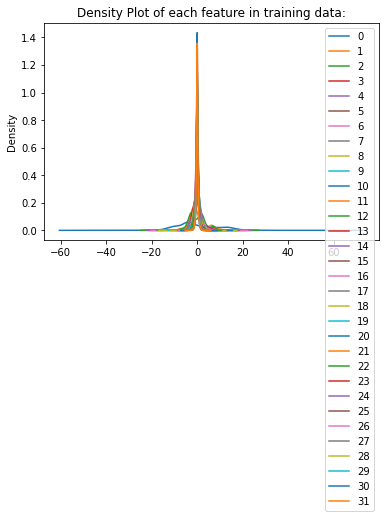

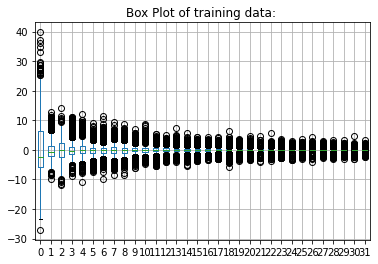

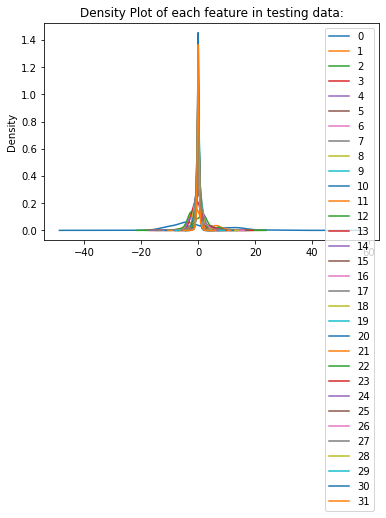

Text(0.5, 1.0, 'Box Plot of testing data: ')

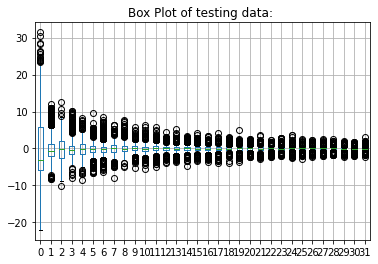

In [ ]:
#Density plot of each feature in training data
fig2 = X_train.plot(kind = 'density')
fig2.set_title('Density Plot of each feature in training data:')
plt.show()
print()

#box plot to check outliers
fig1 = X_train.boxplot()
fig1.set_title('Box Plot of training data: ')
plt.show()
print()


#Checking testing data

# Density plot of each feature in training data
fig2 = X_test.plot(kind = 'density')
fig2.set_title('Density Plot of each feature in testing data:')
plt.show()
print()

#box plot to check outliers
fig1 = X_test.boxplot()
fig1.set_title('Box Plot of testing data: ')


In [ ]:
norm_X_train = (X_train - X_train.mean())/X_train.std()
norm_X_test = (X_test - X_test.mean())/X_test.std()

In [ ]:
X_train = norm_X_train.values
X_test = norm_X_test.values
y_train = y_train.values
y_test = y_test.values

## 1. XGB Classifier

Assumption : 

In [ ]:

X_tran,X_val,y_tran,y_val=train_test_split(X_train,y_train,test_size=0.10,random_state=77,stratify=y_train)

In [ ]:

# prepare_the_datasets_to_evaluate_each_iteration
evalset = [(X_tran, y_tran), (X_val,y_val)]

In [47]:
from numpy import loadtxt
from xgboost import XGBClassifier

clf_XGB = XGBClassifier(n_estimators=1000, early_stopping_rounds=10, eta = 0.1, subsample=0.5, colsample_bytree=0.5)
clf_XGB.fit(X_tran, y_tran, eval_metric='error', eval_set=evalset)
pred_XGB =clf_XGB.predict(X_test)
y_score_XGB =clf_XGB.predict_proba(X_test)[:,1]
acc_XGB =accuracy_score(y_test,pred_XGB)
f1_score_XGB =metrics.f1_score(y_test, pred_XGB)
roc_XGB =metrics.roc_auc_score(y_test, y_score_XGB)
print('XGB classifier model results')
print(['Test Accuracy:',acc_XGB,'F1-score:',f1_score_XGB,'ROC :',roc_XGB])
print()
print('Confusion matrix')
print(confusion_matrix(y_test, pred_XGB))
print()
print('Classification Report')
print(classification_report(y_test, pred_XGB))

[0]	validation_0-error:0.178644	validation_1-error:0.183066
[1]	validation_0-error:0.138379	validation_1-error:0.139588
[2]	validation_0-error:0.13736	validation_1-error:0.132723
[3]	validation_0-error:0.119521	validation_1-error:0.116705
[4]	validation_0-error:0.110092	validation_1-error:0.114416
[5]	validation_0-error:0.103976	validation_1-error:0.107551
[6]	validation_0-error:0.094292	validation_1-error:0.084668
[7]	validation_0-error:0.092508	validation_1-error:0.091533
[8]	validation_0-error:0.088175	validation_1-error:0.09611
[9]	validation_0-error:0.084862	validation_1-error:0.09611
[10]	validation_0-error:0.08053	validation_1-error:0.084668
[11]	validation_0-error:0.080275	validation_1-error:0.08238
[12]	validation_0-error:0.070591	validation_1-error:0.080092
[13]	validation_0-error:0.070336	validation_1-error:0.084668
[14]	validation_0-error:0.069827	validation_1-error:0.086957
[15]	validation_0-error:0.06524	validation_1-error:0.073227
[16]	validation_0-error:0.06473	validati

Learning curve is plot using train and validation data set. Tran and validation data set were split in ratio 90:10 . We observed from the learning curve that we need to increase number of iterations and fit the model to get better learning curve. After this , We observed long flat learning curve, indication that learning rate might be large and resulting in fast learning. So, to reduced the learning rate to 0.05 i.e., eta = 0.05 to limit contribution of each tree added to the ensemble. ANd also we added regularization to avoid any overfitting of data. This was achieved by reucing number of features and samples  used to construct each tree in the model.

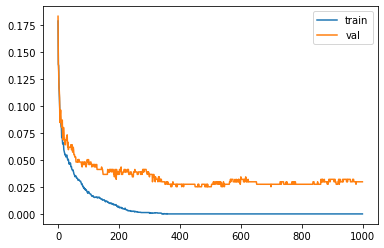

In [ ]:

from matplotlib import pyplot
# retrieve performance metrics
results = clf_XGB.evals_result()
# plot learning curves
pyplot.plot(results['validation_0']['error'], label='train')
pyplot.plot(results['validation_1']['error'], label='val')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## 2. KNN

In [ ]:
acc3_list_KNN = []
f1_score3_list_KNN = []
roc_3_list_KNN = []

In [ ]:
for i in range(1,30):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train) 
    pred_KNN = neigh.predict(X_test)
    #pred_KN = average(pred_KN)
    y_score_KNN = neigh.predict(X_test)
    acc3_list_KNN.append(accuracy_score(y_test, pred_KNN))
    f1_score3_list_KNN.append(metrics.f1_score(y_test, pred_KNN))
    roc_3_list_KNN.append(metrics.roc_auc_score(y_test, y_score_KNN))

In [48]:
print('Best value for K from hyper parameter tuning')
acc3_list_KNN.index(max(acc3_list_KNN))+1

Best value for K from hyper parameter tuning


5

In [46]:
neigh = KNeighborsClassifier(n_neighbors=acc3_list_KNN.index(max(acc3_list_KNN))+1)
neigh.fit(X_train, y_train) 
pred_KN = neigh.predict(X_test)
#pred_KN = average(pred_KN)
y_score_KN = neigh.predict_proba(X_test)[:,1]
acc_KN = accuracy_score(y_test, pred_KN)
f1_score__KN = metrics.f1_score(y_test, pred_KN)
roc_KN = metrics.roc_auc_score(y_test, y_score_KN)

print('KNN model results')
print(['Accuracy:',acc_KN,'F1 Score:',f1_score__KN,'ROC:',roc_KN])
print()
print('Confusion matrix')
print(confusion_matrix(y_test, pred_KN))
print()
print('Classification Report')
print(classification_report(y_test, pred_KN))

KNN model results
['Accuracy:', 0.9660861594867094, 'F1 Score:', 0.9653882132834425, 'ROC:', 0.9940871055549955]

Confusion matrix
[[538   7]
 [ 30 516]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       545
         1.0       0.99      0.95      0.97       546

    accuracy                           0.97      1091
   macro avg       0.97      0.97      0.97      1091
weighted avg       0.97      0.97      0.97      1091



## 3. MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

F1_score_4_list_MLP = []
acc4_list_MLP = []
roc_4_list_MLP = []
mlp = []

hidden_units = [10,20,30,40,50,60,70,100]
hidden_units_2 = [10,20,30,40,50,60,70,100]
optimizer = ['sgd','adam','lbfgs']
activation = ['logistic','tanh','relu']
alpha =[0.0001,0.001,0.01,0.1]
for j in activation:
    for i in optimizer:
        for k in hidden_units:
            for l in alpha:
                  clf_MLP = MLPClassifier(alpha = l, max_iter=3000,learning_rate = 'adaptive',hidden_layer_sizes= (k,k), activation =  j, solver= i, validation_fraction=0.1,early_stopping=True)
                  clf_MLP.fit(X_train, y_train)
                  pred_MLP = clf_MLP.predict(X_test)
                  #pred_MLP = average(pred_MLP)
                  y_score_MLP = clf_MLP.predict_proba(X_test)[:,1]
                  acc4_list_MLP.append(accuracy_score(y_test,pred_MLP))
                  roc_4_list_MLP.append(metrics.roc_auc_score(y_test, y_score_MLP))
                  F1_score_4_list_MLP.append(metrics.f1_score(y_test, pred_MLP))
                  mlp.append([j,i,k,l])

In [ ]:
print("Best Accuracy: ", max(acc4_list_MLP))
min_index = acc4_list_MLP.index(max(acc4_list_MLP))
print("Best parameters combination:", mlp[min_index])

Best Accuracy:  0.9880843263061412
Best parameters combination: ['relu', 'lbfgs', 70, 0.01]


In [45]:
clf_MLP = MLPClassifier(alpha = 0.01, max_iter=3000,hidden_layer_sizes= (70,70), activation ='relu',solver= 'lbfgs',validation_fraction=0.2,early_stopping=True)
    
clf_MLP.fit(X_train, y_train)
pred_MLP = clf_MLP.predict(X_test)
acc_MLP = accuracy_score(y_test,pred_MLP)
f1_score_MLP = metrics.f1_score(y_test, pred_MLP)

y_score_MLP = clf_MLP.predict_proba(X_test)[:,1]
roc_MLP = metrics.roc_auc_score(y_test, y_score_MLP)
print('MLP classifier model results')
print(['Acuracy',acc_MLP,'F1 Score',f1_score_MLP,'ROC',roc_MLP])
print()
print('Confusion matrix')
print(confusion_matrix(y_test, pred_MLP))
print()
print('Classification Report')
print(classification_report(y_test, pred_MLP))

MLP classifier model results
['Acuracy', 0.9816681943171403, 'F1 Score', 0.9817518248175183, 'ROC', 0.9979685452162517]

Confusion matrix
[[533  12]
 [  8 538]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       545
         1.0       0.98      0.99      0.98       546

    accuracy                           0.98      1091
   macro avg       0.98      0.98      0.98      1091
weighted avg       0.98      0.98      0.98      1091



## 4. Random Forest

In [ ]:

acc_RF=[]
max_depth = []
for i in range(1,10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train) 
    pred_RF = clf_RF.predict(X_test)
    #pred_RF = average(pred_RF)
    acc_RF.append(accuracy_score(pred_RF, y_test))
    max_depth.append(i)
print (max(acc_RF))

0.9780018331805683


In [ ]:
best_depth_6 = max_depth[acc_RF.index(max(acc_RF))]

In [ ]:
print('Best depth value after hyper parameter tuning',best_depth_6)

Best depth value after hyper parameter tuning 9


In [44]:
clf_RF = RandomForestClassifier(max_depth=best_depth_6)
clf_RF.fit(X_train, y_train) 
y_pred_RF = clf_RF.predict(X_test)
#pred_RF = average(pred_RF)
y_score_RF = clf_RF.predict_proba(X_test)[:,1]
acc_RF = accuracy_score(y_test, pred_RF)
f1_score_RF = metrics.f1_score(y_test, y_pred_RF)
roc_RF = metrics.roc_auc_score(y_test, y_score_RF)

print('Random Forest model results')
print(['Accuracy',acc_RF,'F1-score',f1_score_RF,'ROC',roc_RF])
print()
print('Confusion matrix')
print(confusion_matrix(y_test, pred_RF))
print()
print('Classification Report')
print(classification_report(y_test, pred_RF))


Random Forest model results
['Accuracy', 0.9780018331805683, 'F1-score', 0.9725776965265082, 'ROC', 0.9964781395974056]

Confusion matrix
[[532  13]
 [ 11 535]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       545
         1.0       0.98      0.98      0.98       546

    accuracy                           0.98      1091
   macro avg       0.98      0.98      0.98      1091
weighted avg       0.98      0.98      0.98      1091



## 5.SVM

In [36]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
cv = StratifiedShuffleSplit(n_splits = 5, test_size=0.33, random_state = 42)
svc=SVC(probability=True)
clf_svm=GridSearchCV(svc,param_grid,cv =cv)

In [37]:

clf_svm.fit(X_train,y_train)
print('Model is trained well for the image dataset using cross validation ')
clf_svm.best_params_

Model is trained well for the image dataset using cross validation 


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [43]:
svm_model =  SVC(kernel = 'rbf', gamma =0.001, C =  100,probability=True)
svm_model.fit(X_train,y_train)
y_score_SVM = svm_model.predict_proba(X_test)[:,1]
y_pred_SVM=svm_model.predict(X_test)

acc_SVM = accuracy_score(y_pred_SVM,y_test)
f1_score_SVM = metrics.f1_score(y_test, y_pred_SVM)

y_score_SVM = clf_MLP.predict_proba(X_test)[:,1]
roc_SVM = metrics.roc_auc_score(y_test, y_score_SVM)

print('Support vector classifier model results')
print()
print(f"The model is {accuracy_score(y_pred_SVM,y_test)*100}% accurate")
print()
print(['F1-score',f1_score_SVM,'ROC',roc_SVM])
print()
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred_SVM))
print()
print('Classification Report')
print(classification_report(y_test, y_pred_SVM))


Support vector classifier model results

The model is 97.15857011915674% accurate

['F1-score', 0.9714811407543699, 'ROC', 0.9973081963907652]

Confusion matrix
[[532  13]
 [ 18 528]]

Classification Report
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       545
         1.0       0.98      0.97      0.97       546

    accuracy                           0.97      1091
   macro avg       0.97      0.97      0.97      1091
weighted avg       0.97      0.97      0.97      1091



## Comparing accuracy of all models

,Accuracy
Model,
KNN,96.608616
MLP,98.441797
Random Forest,97.800183
SVM,97.158570
XGB Classifier,97.616865


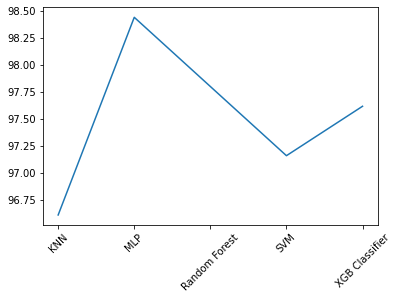

In [40]:
acc_total = {'Model':[ 'KNN', 'MLP','Random Forest','SVM','XGB Classifier'],
        'Accuracy':[ acc_KN*100, acc_MLP*100,acc_RF*100, acc_SVM*100, acc_XGB*100]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)
acc_total

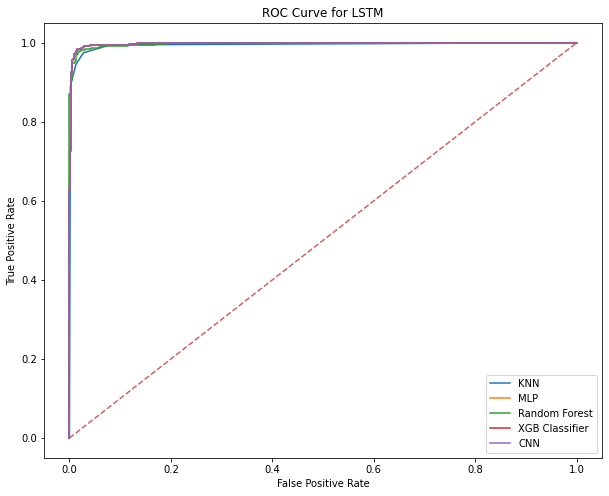

In [41]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_KN)
fpr_4, tpr_4, thresholds = roc_curve(y_test, y_score_MLP)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_score_RF)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_score_XGB)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_score_SVM)
plt.plot(fpr_3, tpr_3, label= "KNN")
plt.plot(fpr_4, tpr_4, label= "MLP")
plt.plot(fpr_6, tpr_6, label= "Random Forest")
plt.plot(fpr_7, tpr_7, label= "XGB Classifier")
plt.plot(fpr_7, tpr_7, label= "CNN")
plt.title('ROC Curve for LSTM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

## Comparing log loss for all the classification models

KNeighborsClassifier
****Results****
Accuracy: 96.6086%
Log Loss: 1.1713476845038566


SVC
****Results****
Accuracy: 97.1586%
Log Loss: 0.9814046407046972


MLPClassifier
****Results****
Accuracy: 98.1668%
Log Loss: 0.6331661993308404


RandomForestClassifier
****Results****
Accuracy: 97.1586%
Log Loss: 0.9814046407046972


XGBClassifier
****Results****
Accuracy: 97.0669%
Log Loss: 1.013066944993874




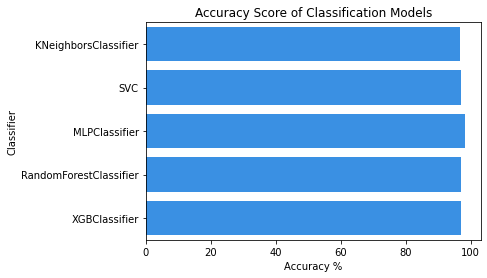

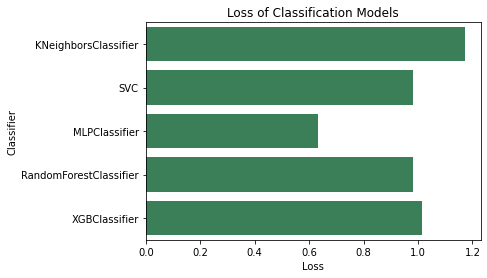

In [42]:
classifiers = [
    #LogisticRegression(verbose=1,solver='lbfgs', max_iter=110),
    KNeighborsClassifier(n_neighbors = 5),
    SVC(C=100,gamma= 0.001, kernel= 'rbf', probability=True),
    MLPClassifier(alpha = 0.001, max_iter=300,hidden_layer_sizes= (50), activation ='relu',learning_rate = 'adaptive', solver= 'lbfgs',validation_fraction=0.2,early_stopping=True),
    #DecisionTreeClassifier(criterion = 'gini', max_depth = 3),
    RandomForestClassifier(max_depth = 8,n_estimators=100,criterion='gini'),
    XGBClassifier(n_estimators=120, leanring_rate=0.05, probability= True)
    ]


#report models
log_cols = ["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns = log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("=" * 30)
    print(name)
    print('****Results****')
    
    train_predictions = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict(X_test)
    ll = metrics.log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    print("\n")
    
    log_entry = pd.DataFrame([[name, acc * 100, ll]], columns = log_cols)
    log = log.append(log_entry)
    
print("=" * 30)


#visualize accuracy models
sns.set_color_codes("muted")
sns.barplot(x = 'Accuracy', y = 'Classifier', data = log, color = 'dodgerblue')
plt.xlabel('Accuracy %')
plt.title('Accuracy Score of Classification Models')
plt.show()

#visualize log loss models
sns.barplot(x = 'Log Loss', y = 'Classifier', data = log, color = 'seagreen')
plt.xlabel('Loss')
plt.title('Loss of Classification Models')
plt.show()